### Impot Libraries required for EDA

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

### Initial Work on the Dataset

In [38]:
df = pd.read_excel('./Contraceptive_method_dataset.xlsx')

In [39]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [40]:
df.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


In [41]:
df.shape

(1473, 10)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


#### NULL Values Treatment

In [43]:
df.isna().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [44]:
## Imputing Wife_Age NaN values with median value of Wife_age
df['Wife_age'].fillna(value=df['Wife_age'].median(), inplace=True)

In [45]:
df.isna().sum()

Wife_age                      0
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [46]:
df['No_of_children_born'].unique()

array([ 3., 10.,  7.,  9.,  8.,  0.,  6.,  1.,  2.,  4.,  5., 12., 11.,
       13., 16., nan])

In [47]:
df[df['No_of_children_born'].isna()]

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1451,37.0,Primary,Tertiary,NaN,Scientology,Yes,2,High,Exposed,Yes
1452,26.0,Secondary,Primary,NaN,Scientology,No,3,Very High,Exposed,Yes
1453,28.0,Uneducated,Secondary,NaN,Scientology,No,3,Very High,Exposed,Yes
1454,31.0,Secondary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1455,32.0,Primary,Primary,NaN,Scientology,No,2,High,Exposed,Yes
1456,40.0,Primary,Primary,NaN,Non-Scientology,Yes,2,Very High,Exposed,Yes
1457,27.0,Secondary,Secondary,NaN,Scientology,No,2,Very High,Exposed,Yes
1458,27.0,Primary,Primary,NaN,Scientology,No,2,Low,Not-Exposed,Yes
1459,37.0,Tertiary,Tertiary,NaN,Non-Scientology,Yes,2,Very High,Exposed,Yes
1460,22.0,Tertiary,Secondary,NaN,Scientology,No,2,Low,Exposed,Yes


In [48]:
df.groupby(['No_of_children_born'])['Wife_age'].mean()

No_of_children_born
0.0     27.659794
1.0     27.315018
2.0     30.160584
3.0     32.435294
4.0     35.005208
5.0     36.236641
6.0     38.333333
7.0     39.306122
8.0     41.608696
9.0     40.125000
10.0    43.727273
11.0    43.545455
12.0    42.250000
13.0    46.000000
16.0    48.000000
Name: Wife_age, dtype: float64

In [49]:
df.No_of_children_born.mode()

0    2.0
Name: No_of_children_born, dtype: float64

<b>For No_of_children_born</b> The NaN values in No_of_children_born could be 0 or could be any other number as well. It can be a discrete value only, cannot be continuous. So, we cannot fill it with mean or median. We can do one of the following treatments for this:-
- fill it with mode of No_of_children_born = 2
- create a function based on mean age and fill accordingly, eg. <30 ~ 1, 30-35 ~ 2, etc.
- drop these null values as 21 is very small as compared to total records = 1473

<b>We will proceed with mode imputation for this column.</b>

In [50]:
df['No_of_children_born'].fillna(value=df['No_of_children_born'].mode()[0], inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [52]:
df.isna().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

#### Duplicate Values Treatment

In [53]:
df.duplicated().sum()

84

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1389 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1389 non-null   float64
 1   Wife_ education            1389 non-null   object 
 2   Husband_education          1389 non-null   object 
 3   No_of_children_born        1389 non-null   float64
 4   Wife_religion              1389 non-null   object 
 5   Wife_Working               1389 non-null   object 
 6   Husband_Occupation         1389 non-null   int64  
 7   Standard_of_living_index   1389 non-null   object 
 8   Media_exposure             1389 non-null   object 
 9   Contraceptive_method_used  1389 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.4+ KB


### Univariate Analysis

<Axes: xlabel='Wife_age'>

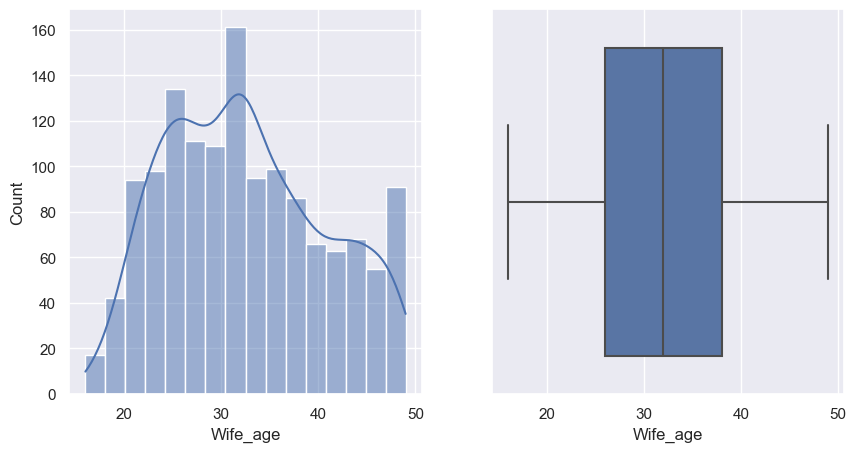

In [56]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Wife_age', kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Wife_age')

`Wife_age` is near to normal if we look at the boxplot but not when we look at the histogram. From the histogram, we can observe different peaks; they could be due to some other categorical variable overlapping each other and hence the complete histogram looks like this. For example, the below graph between `Wife_age` and `Wife_ education`; 2 of them still have 2 peaks in each but we can see them almost overalpping each other. Similarly, some other categories must be influencing it.

<Axes: xlabel='Wife_age', ylabel='Density'>

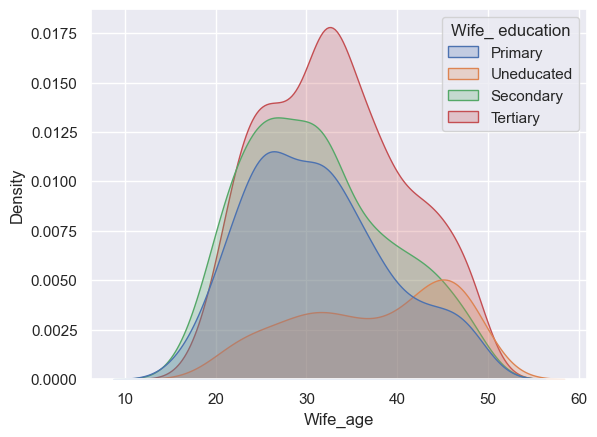

In [113]:
sns.kdeplot(data=df, x='Wife_age', hue='Wife_ education', fill=True)

<Axes: xlabel='Husband_Occupation'>

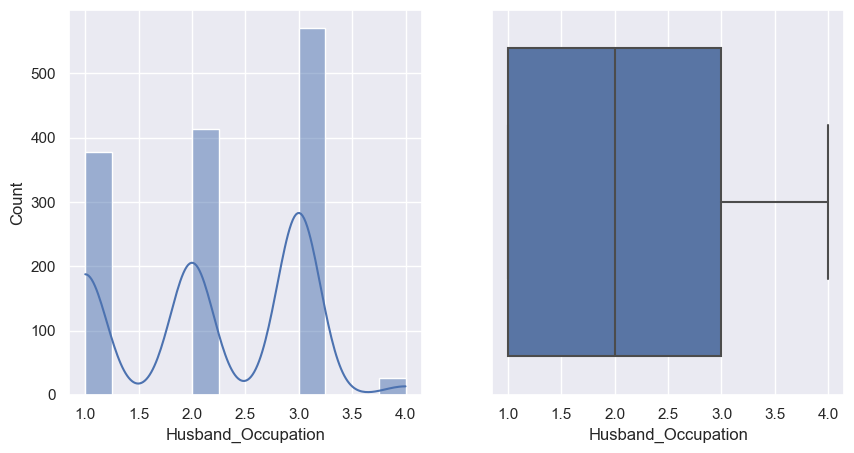

In [58]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Husband_Occupation', kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Husband_Occupation')

Cannot consider `Husband_Occupation` as discrete numeric. It is discrete categorical and that too ordinal.

<Axes: xlabel='No_of_children_born'>

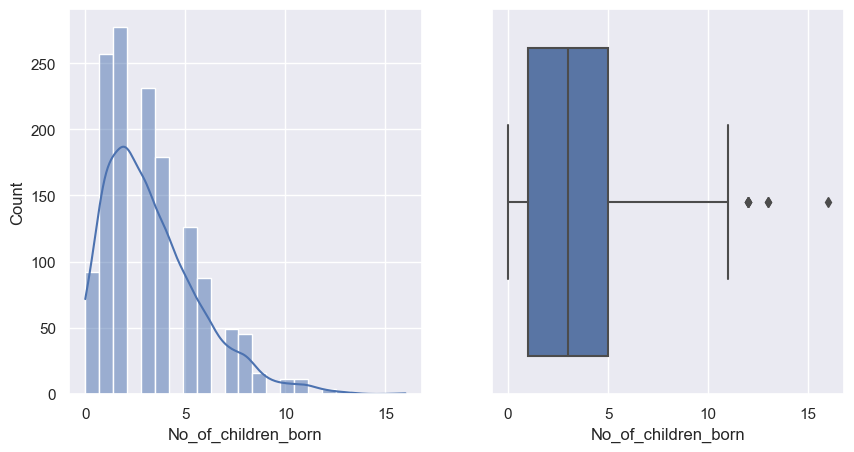

In [59]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='No_of_children_born', kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df, x='No_of_children_born')

We can ignore the outliers in `No_of_children_born` as they are only 3 of them and this variable also has finite unique values.

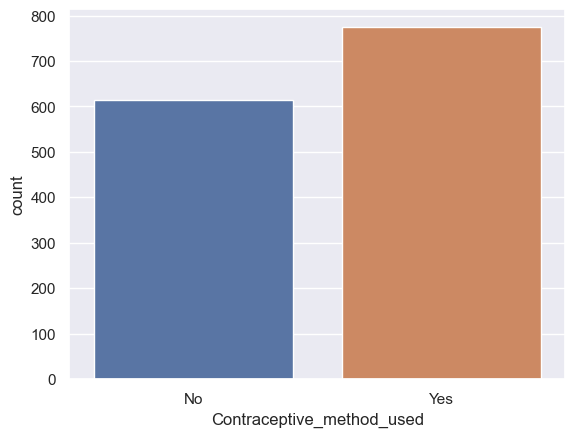

In [60]:
sns.countplot(data=df, x='Contraceptive_method_used', );

In [61]:
df['Contraceptive_method_used'].value_counts(normalize=True)

Contraceptive_method_used
Yes    0.557955
No     0.442045
Name: proportion, dtype: float64

According to data
- ~ 56% of women used contraceptive
- ~ 44% of women did not use contraceptive
- data is slightly siding towards +ve result

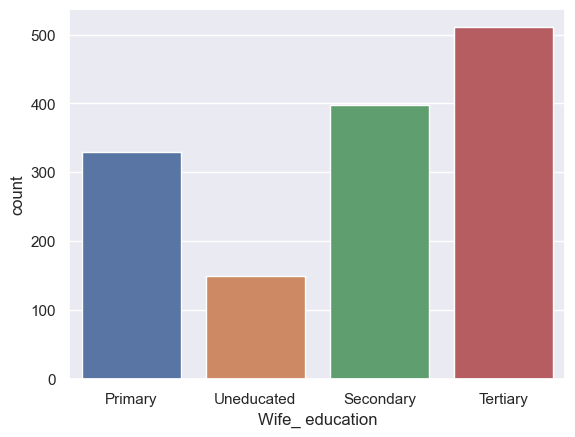

In [62]:
sns.countplot(data=df, x='Wife_ education');

Label encoding will be done for `Wife_ education` in ordinal manner. The dataset has majority of highly educated women.

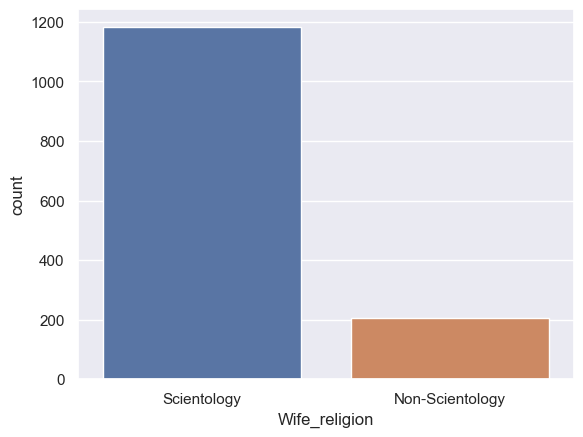

In [63]:
sns.countplot(data=df, x='Wife_religion');

One-hot encoding will be done for `Wife_religion`. The ratio of Scientology to Non-Scientology is very high.

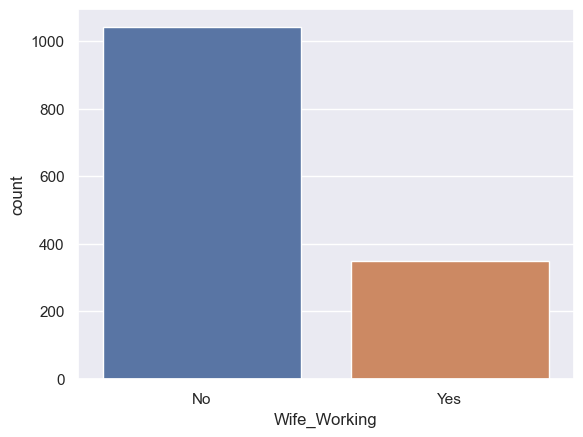

In [64]:
sns.countplot(data=df, x='Wife_Working');

One-hot encoding will be done for `Wife_Working`. Same can be said about whether a woman is working or not.

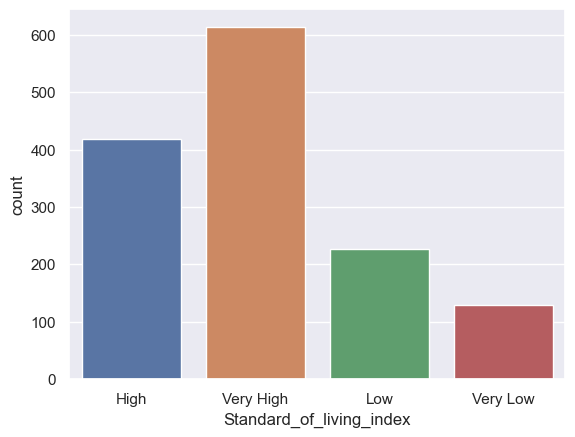

In [65]:
sns.countplot(data=df, x='Standard_of_living_index');

Label encoding will be done for `Standard_of_living_index` in ordinal manner.

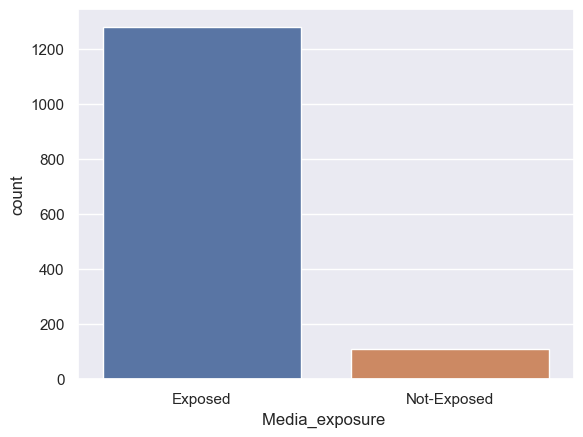

In [66]:
sns.countplot(data=df, x='Media_exposure ');

One-hot encoding will be done for `Media_exposure `.

### Bi-variate Analysis

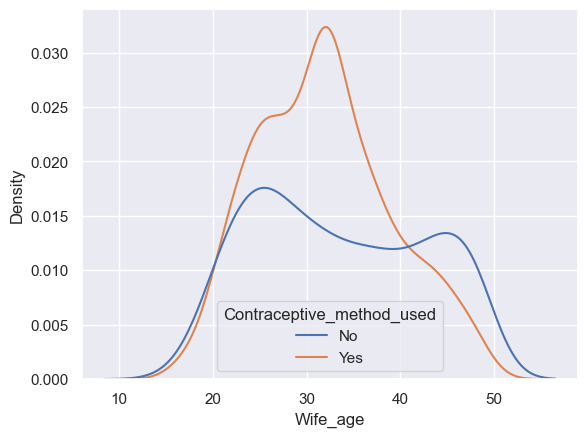

In [67]:
sns.kdeplot(data=df, x='Wife_age', hue='Contraceptive_method_used');

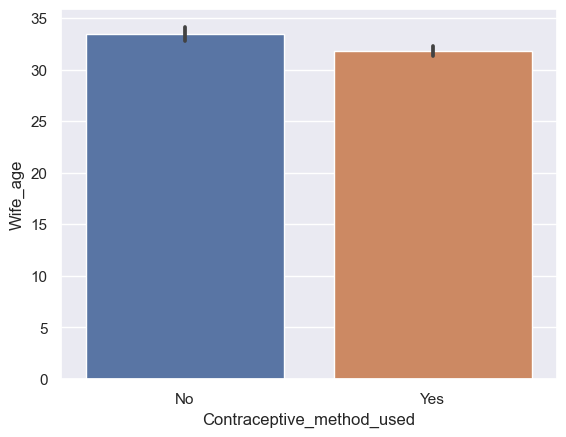

In [68]:
sns.barplot(data=df, x='Contraceptive_method_used', y='Wife_age');

/Users/appurohi/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


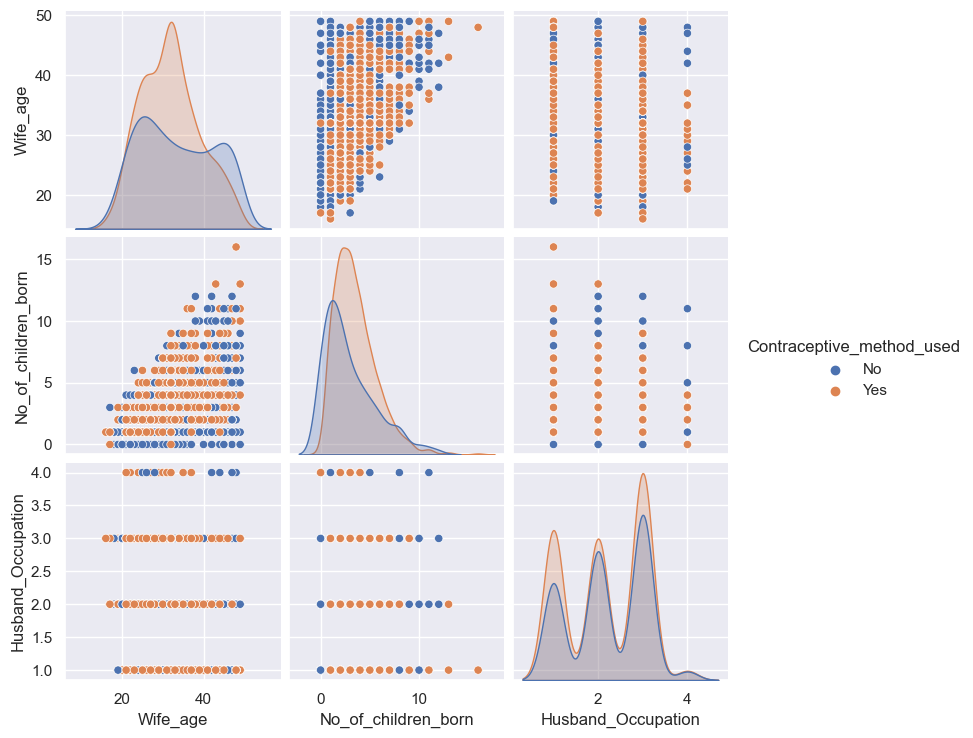

In [69]:
sns.pairplot(data=df, diag_kind='kde', hue='Contraceptive_method_used');

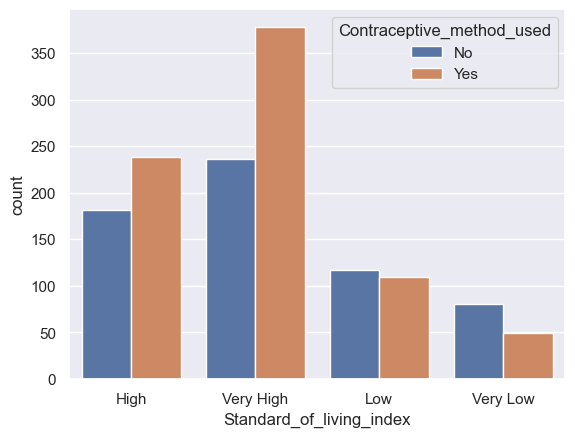

In [70]:
sns.countplot(data=df, x='Standard_of_living_index', hue='Contraceptive_method_used');

In [71]:
pd.crosstab(df['Standard_of_living_index'], df['Contraceptive_method_used'], margins=True)

Contraceptive_method_used,No,Yes,All
Standard_of_living_index,,,
High,181,238,419
Low,117,110,227
Very High,236,378,614
Very Low,80,49,129
All,614,775,1389


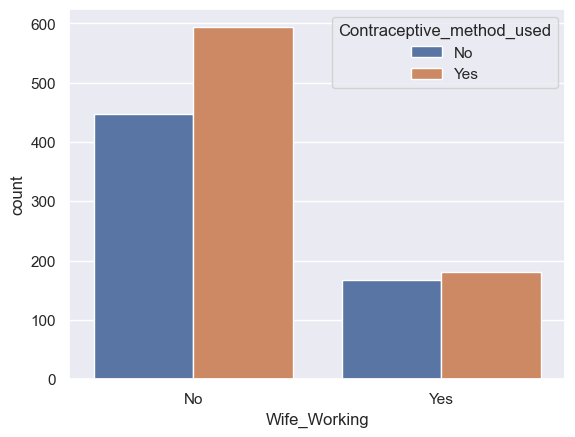

In [72]:
sns.countplot(data=df, x='Wife_Working', hue='Contraceptive_method_used');

In [73]:
pd.crosstab(df['Wife_Working'], df['Contraceptive_method_used'], margins=True)

Contraceptive_method_used,No,Yes,All
Wife_Working,,,
No,447,594,1041
Yes,167,181,348
All,614,775,1389


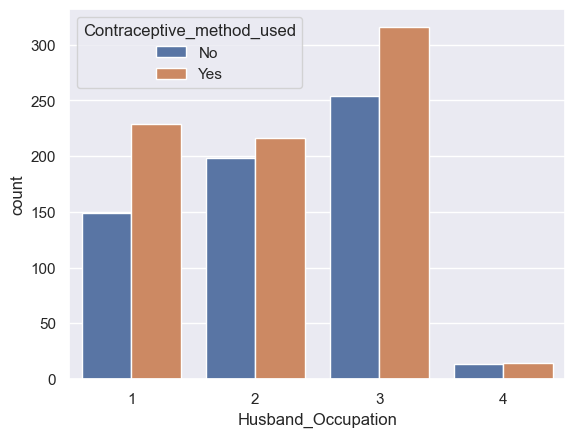

In [74]:
sns.countplot(data=df, x='Husband_Occupation', hue='Contraceptive_method_used');

In [75]:
pd.crosstab(df['Husband_Occupation'], df['Contraceptive_method_used'], margins=True)

Contraceptive_method_used,No,Yes,All
Husband_Occupation,,,
1,149,229,378
2,198,216,414
3,254,316,570
4,13,14,27
All,614,775,1389


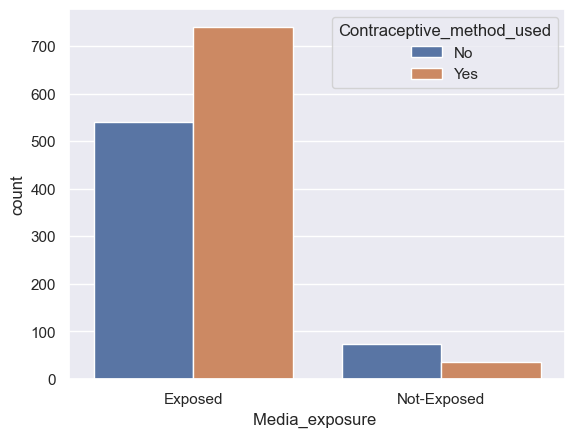

In [76]:
sns.countplot(data=df, x='Media_exposure ', hue='Contraceptive_method_used');

In [77]:
pd.crosstab(df['Media_exposure '], df['Contraceptive_method_used'], margins=True)

Contraceptive_method_used,No,Yes,All
Media_exposure,,,
Exposed,540,740,1280
Not-Exposed,74,35,109
All,614,775,1389


### Encoding the Data for Logistic Regression

In [78]:
df.sample(10)

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
303,24.0,Primary,Tertiary,2.0,Scientology,No,3,Very High,Exposed,No
1302,38.0,Tertiary,Tertiary,4.0,Scientology,No,2,Very High,Exposed,Yes
712,31.0,Secondary,Secondary,3.0,Scientology,No,2,Very Low,Not-Exposed,Yes
867,23.0,Uneducated,Primary,3.0,Scientology,No,3,Low,Not-Exposed,Yes
1047,28.0,Secondary,Tertiary,1.0,Non-Scientology,No,2,Low,Exposed,No
1343,37.0,Secondary,Secondary,6.0,Scientology,No,3,High,Exposed,Yes
1356,30.0,Secondary,Tertiary,3.0,Non-Scientology,No,3,High,Exposed,Yes
678,24.0,Secondary,Tertiary,3.0,Scientology,No,1,Very High,Exposed,Yes
1453,28.0,Uneducated,Secondary,2.0,Scientology,No,3,Very High,Exposed,Yes
1130,34.0,Primary,Tertiary,6.0,Scientology,Yes,3,Very High,Exposed,No


In [79]:
cat_replace = {
    'Wife_ education': {'Uneducated': 0, 'Primary': 1, 'Secondary':2, 'Tertiary': 3},
    'Husband_education': {'Uneducated': 0, 'Primary': 1, 'Secondary':2, 'Tertiary': 3},
    'Media_exposure ': {'Exposed': 1, 'Not-Exposed': 0},
    'Wife_Working': {'Yes': 1, 'No':0},
    'Standard_of_living_index': {'Very Low': 0, 'Low': 1, 'High': 2, 'Very High': 3},
    'Contraceptive_method_used': {'Yes': 1, 'No':0},
    'Wife_religion': {'Scientology': 1, 'Non-Scientology': 0}
}

In [80]:
df_final = df.replace(cat_replace)

### Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

In [82]:
X = df_final.drop('Contraceptive_method_used', axis=1)
y = df_final['Contraceptive_method_used']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [84]:
X_train.shape, X_test.shape

((972, 9), (417, 9))

In [91]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [92]:
y_train_pred = logreg.predict(X_train)

In [93]:
print("Train Accuracy:--\n\n",classification_report(y_train, y_train_pred))

Train Accuracy:--

               precision    recall  f1-score   support

           0       0.68      0.52      0.59       438
           1       0.67      0.79      0.73       534

    accuracy                           0.67       972
   macro avg       0.67      0.66      0.66       972
weighted avg       0.67      0.67      0.66       972



<b>Train Accuracy Score ~ <u>67%</u></b>

In [96]:
y_pred = logreg.predict(X_test)

In [98]:
print("Test Confusion Matrix:--\n\n",confusion_matrix(y_test, y_pred))

Test Confusion Matrix:--

 [[ 77  99]
 [ 47 194]]


In [100]:
print("Test Accuracy:--\n\n",classification_report(y_test, y_pred))

Test Accuracy:--

               precision    recall  f1-score   support

           0       0.62      0.44      0.51       176
           1       0.66      0.80      0.73       241

    accuracy                           0.65       417
   macro avg       0.64      0.62      0.62       417
weighted avg       0.64      0.65      0.64       417



<b>Test Accuracy Score ~ <u>65%</u></b>

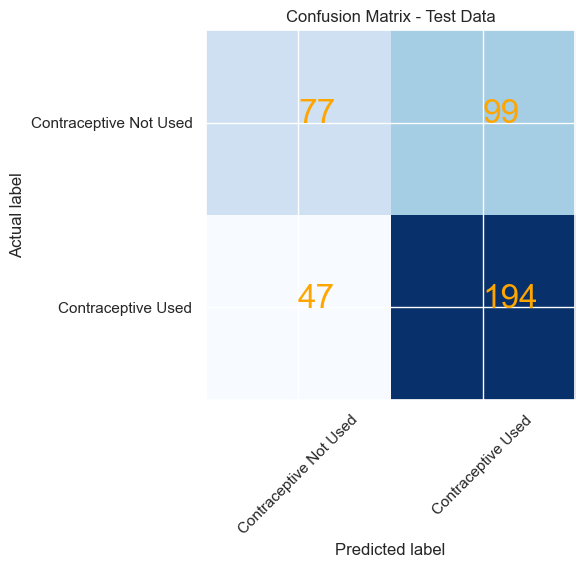

In [134]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap='Blues')
classNames = ['Contraceptive Not Used', 'Contraceptive Used']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(cm[i][j]), c='orange', size=24)
plt.show()

#### ROC - AUC Metrics

In [101]:
# train probability scores
prob_train = logreg.predict_proba(X_train)[:, 1]
# test probability scores
prob_test = logreg.predict_proba(X_test)[:, 1]
# train false_positive_rates and true_positive_rates
fpr_train, tpr_train, threshold_train = roc_curve(y_train, prob_train)
# test false_positive_rates and true_positive_rates
fpr_test, tpr_test, threshold_test = roc_curve(y_test, prob_test)

In [102]:
roc_auc_train = auc(fpr_train, tpr_train)
print("Train AUC: ",roc_auc_train)

Train AUC:  0.7030616694884819


In [103]:
roc_auc_test = auc(fpr_test, tpr_test)
print("Test AUC: ",roc_auc_test)

Test AUC:  0.6712914937759336


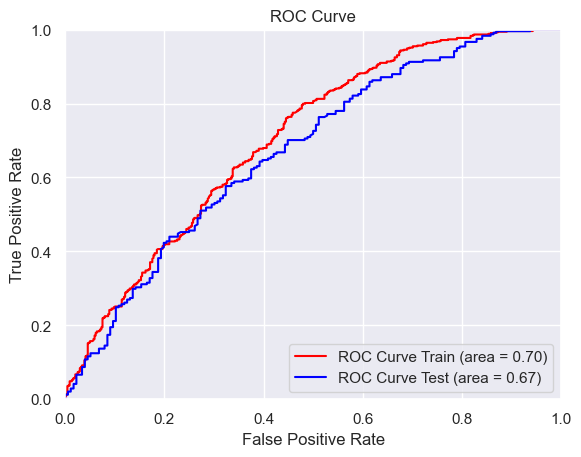

In [111]:
plt.plot(fpr_train, tpr_train, label='ROC Curve Train (area = %0.2f)' % roc_auc_train, c='Red')
plt.plot(fpr_test, tpr_test, label='ROC Curve Test (area = %0.2f)' % roc_auc_test, c='Blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Checking the coefficients for features after Logistic Regression 

In [167]:
pd.DataFrame(logreg.coef_.T, index=X_test.columns)

,0
Wife_age,-0.083342
Wife_ education,0.429297
Husband_education,0.145095
No_of_children_born,0.279739
Wife_religion,-0.347770
Wife_Working,-0.103731
Husband_Occupation,0.086504
Standard_of_living_index,0.190627
Media_exposure,0.470340


In [168]:
logreg.intercept_

array([0.15507407])

### THE END